# Logistic Regression

A simple implementation of logistic regression in Python to discover the effect of various factors in the admission of candidates into graduate schools. Uses data from UCLA. Credit to the tutorial from yhat at http://blog.yhat.com/posts/logistic-regression-and-python.html for being a starting point and good guide (though the tutorial is not strictly followed).

In [235]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

In [11]:
# As we import the data, we rename the "Rank" column to "Prestige" to avoid confusion with the rank method of pandas
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv", header = 0, names = ["Admit", 'GRE', 'GPA', 'Prestige'])
df.head()

,Admit,GRE,GPA,Prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [13]:
# Basic summary of the data
df.describe()

,Admit,GRE,GPA,Prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [22]:
# Generate a cross-tabulation (frequency table by default) of the factors
pd.crosstab(df['Admit'], df['Prestige'], rownames=['Admission'])

Prestige,1,2,3,4
Admission,,,,
0,28,97,93,55
1,33,54,28,12


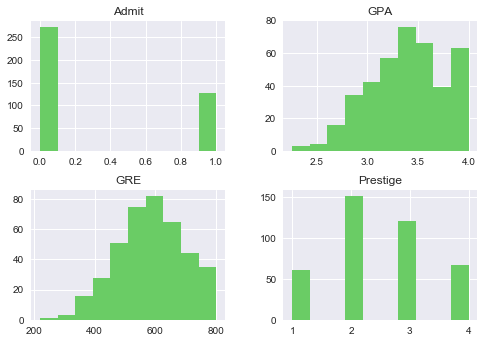

In [41]:
# Generate histograms
sns.set_color_codes('muted')
df.hist(color='g')
plt.show()

In [43]:
# Dummy code the rank variable
dummy_ranks = pd.get_dummies(df['Prestige'], prefix="Prestige")
dummy_ranks.head()

,Prestige_1,Prestige_2,Prestige_3,Prestige_4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [62]:
columns1 = ['Admit', 'GRE', 'GPA']
data1 = df[columns1]
columns2 = ['Prestige_1','Prestige_2','Prestige_3']
data2 = dummy_ranks[columns2]
data = pd.merge(data1, data2, how="outer", left_index=True, right_index=True)
data

,Admit,GRE,GPA,Prestige_1,Prestige_2,Prestige_3
0,0,380,3.61,0.0,0.0,1.0
1,1,660,3.67,0.0,0.0,1.0
2,1,800,4.00,1.0,0.0,0.0
3,1,640,3.19,0.0,0.0,0.0
4,0,520,2.93,0.0,0.0,0.0
5,1,760,3.00,0.0,1.0,0.0
6,1,560,2.98,1.0,0.0,0.0
7,0,400,3.08,0.0,1.0,0.0
8,1,540,3.39,0.0,0.0,1.0
9,0,700,3.92,0.0,1.0,0.0


## Traditional Logistic Regression

We will use logistic regression to predict the probability that a particular student gets into grad school.

In [178]:
# Separate independent and dependent variables
X = data.ix[:,1:]
y = data['Admit']

# Create a logistic regression model
initial = LogisticRegression(C = 1000)
initial.fit(X,y)

# Check model accuracy
print("Accuracy Score:", initial.score(X,y))

Accuracy Score: 0.7075


In [176]:
# What percentage of students actually got into grad school
print("Actual probability of admission:", y.mean())

Actual probability of admission: 0.3175


If you were guessing "no," you would be right around 68.25% of the time. Our model is more accurate than just guessing "no" by around 2.5%.

Our model is significantly better than random guessing. To be more precise, it is about 20.75% better than just guessing 50/50.

In [177]:
# View coefficients
column_names = list(X.columns)
coefficients = np.transpose(initial.coef_)

pd.DataFrame(coefficients, column_names, columns=['Coefficients'])

,Coefficients
GRE,0.002228
GPA,0.803450
Prestige_1,1.508653
Prestige_2,0.842366
Prestige_3,0.186982


## Modeling Using a Training and a Test Set

We will now create a model based on one training set and one test set, with 70% of the data going into the training set and 30% going into the test set.

In [220]:
# Split data into training and test sets, using 30% of the data as the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fit the logistic regression with lambda = 10^-3
lr = LogisticRegression(C = 1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [221]:
# View predictions
predicted = lr.predict(X_test)
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [222]:
# View class probabilities
probabilities = lr.predict_proba(X_test)
print(probabilities)

[[ 0.64022421  0.35977579]
 [ 0.84820859  0.15179141]
 [ 0.85828566  0.14171434]
 [ 0.80578176  0.19421824]
 [ 0.62378498  0.37621502]
 [ 0.6623231   0.3376769 ]
 [ 0.87367562  0.12632438]
 [ 0.70875513  0.29124487]
 [ 0.79898042  0.20101958]
 [ 0.61110878  0.38889122]
 [ 0.84350899  0.15649101]
 [ 0.70817595  0.29182405]
 [ 0.48183441  0.51816559]
 [ 0.68963801  0.31036199]
 [ 0.32143748  0.67856252]
 [ 0.87409495  0.12590505]
 [ 0.31613189  0.68386811]
 [ 0.54269812  0.45730188]
 [ 0.39399235  0.60600765]
 [ 0.79424349  0.20575651]
 [ 0.75798685  0.24201315]
 [ 0.60557388  0.39442612]
 [ 0.69810048  0.30189952]
 [ 0.80157962  0.19842038]
 [ 0.63457754  0.36542246]
 [ 0.81654046  0.18345954]
 [ 0.51421484  0.48578516]
 [ 0.79934062  0.20065938]
 [ 0.42776407  0.57223593]
 [ 0.86423849  0.13576151]
 [ 0.80606385  0.19393615]
 [ 0.52385954  0.47614046]
 [ 0.78174081  0.21825919]
 [ 0.74683181  0.25316819]
 [ 0.60653022  0.39346978]
 [ 0.79349638  0.20650362]
 [ 0.54235013  0.45764987]
 

In [282]:
# Check accuracy
print("Accuracy Score:", metrics.accuracy_score(y_test, predicted))

Accuracy Score: 0.708333333333


The accuracy score here is slightly (around 0.83%) better than the optimized logistic regression without the training/test split.

In [283]:
# Print confusion matrix and classification report
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, predicted))
print("\nClassification Report:\n",metrics.classification_report(y_test,predicted))

Confusion Matrix:
 [[77  5]
 [30  8]]

Classification Report:
              precision    recall  f1-score   support

          0       0.72      0.94      0.81        82
          1       0.62      0.21      0.31        38

avg / total       0.69      0.71      0.66       120



The confusion matrix shows that out of 82 non-admits, our model got 77 of those right, while 5 of those were false positives. This very good hit rate for 0's is  reflected in the high recall of 0.94 for 0's in the classification report. However, the performance of the model is not as good at predicting admits, with only 8 out of 38 admissions correctly being predicted by the model. Again, this is reflected in the low recall 0.21 for 1's.

Looking at precision, 72% of 0's are indeed 0's, and 62% of identified 1's being actual 1's.

In total, 85 out of 120 results were correctly predicted by the model.

## Plotting the ROC Curve

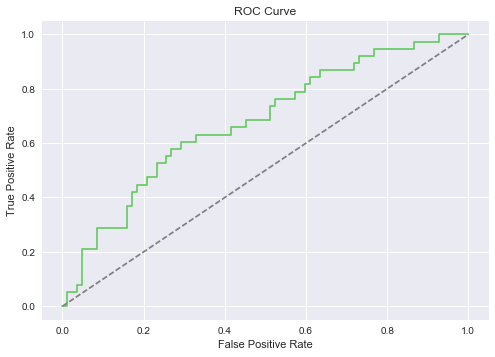

Area Under the Curve: 0.678433889602


In [284]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities[:,1])

results = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

plt.plot(fpr,tpr, color='g')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("Area Under the Curve:", metrics.roc_auc_score(y_test, probabilities[:,1]))

As the plot above shows, while our logistic regression model is not really that good -- the area under the curve is calculated to be 0.6784 -- in accordance with the results earlier, it still does better than random guessing.

## Modeling Using Five-Fold Cross-Validation

We will attempt to improve model accuracy by using five-fold cross-validation on the data.

In [207]:
fivefold = cross_val_score(LogisticRegression(C = 1000), X, y, scoring='accuracy', cv=5)
print("Score per fold:", fivefold)
print("Mean score:", fivefold.mean())


Score per fold: [ 0.69135802  0.75308642  0.7         0.6835443   0.6835443 ]
Mean score: 0.702306610408


Using five-fold cross-validation results in a similar accuracy score.

## Testing Various Values of C

We will check if results change based on the $\lambda$ parameter used in regularization. Note that in scikit-learn's logistic regression, $C = \frac{1}{\lambda}$.

In [214]:
lr2 = LogisticRegression(C = 100)
lr2.fit(X_train, y_train)

lr3 = LogisticRegression(C= 10000)
lr3.fit(X_train, y_train)

lr4 = LogisticRegression(C= 100000)
lr4.fit(X_train, y_train)

print("C = 100:", lr2.score(X_test, y_test))
print("C = 10000:", lr3.score(X_test, y_test))
print("C = 100000:", lr4.score(X_test, y_test))

C = 100: 0.708333333333
C = 10000: 0.725
C = 100000: 0.708333333333


It appears that a C value of 10,000 gives the best accuracy. If this dataset is looked at again, this can be used. Future study of this dataset could include examining interaction terms, checking if there are correlations between variables, and removing features.